Complex models such as deep neural networks can detect subtle patterns in the data, but if the training set is noisy, or if it is too small (which introduces sampling noise), then the model is likely to detect patterns in the noise itself. Obviously these patterns will not generalize to new instances.

Overfitting happens when the model is too complex relative to the amount and noisiness of the training data. One of the possible solution is to gather more training data. 

This project explores alternative solutions in the absence of more training data to increase the accuracy of the neural network as well as reduce overfitting. This project fully explores solutions like using [i] Image Augmentation [ii] Pretrained Network + Image Augmentation for Fine Tuning.

The dataset used for this project can be found at www.kaggle.com/c/dogs-vs-cats/data. This dataset is a 850+mb sized zipped folder containing 25,000 cats and dog images each splitted into a test and train set.

Since the major objective of this project is alternatives when faced with a small dataset, a small subset of images are extracted: 1000 train, 500 validation and 500 test cats and dog images (2000 + 1000 + 1000).

A large bulk of the codes used in this project can be found in chapter five of Francois Chollet's deep learning with python book.

LOADING THE DATA FILES

In [ ]:
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
trainCatsDir ='/content/drive/MyDrive/cats_and_dogs_small/train/cats'

In [ ]:
trainDogsDir = '/content/drive/MyDrive/cats_and_dogs_small/train/dogs'

In [ ]:
validationCatsDir = '/content/drive/MyDrive/cats_and_dogs_small/validation/cats'

In [ ]:
validationDogsDir = '/content/drive/MyDrive/cats_and_dogs_small/validation/dogs'

BUILDING THE CONVOLUTIONAL NEURAL NETWORK (Convnet)

The convnet consists of stacks of alt ernated Conv2D (with relu activation) and MaxPooling2D layers. This serves both to augment the capacity of the network and to further reduce the size of the feature maps so they aren’t overly large when the processed data reaches the Flatten layer. Because this is a binary-classification problem, the network ends with a single unit (a Dense layer of size 1) and a sigmoid activation. This unit will encode the probability that the network is looking at one class or the other.

In [ ]:
from tensorflow.keras import layers, models
from tensorflow import keras

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
from tensorflow.keras import optimizers

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['accuracy'])

DATA PREPROCESSING

The data needs to be formatted into appropriately preprocessed floatingpoint tensors before being fed into the network. Currently, the data sits on a drive as JPEG files, so the steps for getting it into the network are roughly as follows:
1 Read the picture files.
2 Decode the JPEG content to RGB grids of pixels.
3 Convert these into floating-point tensors.
4 Rescale the pixel values (between 0 and 255) to the [0, 1] interval.

Keras ImageDataGenerator class is used to carry out these steps automatically.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
trainDataGen = ImageDataGenerator(rescale=1./255) #Rescales all images by 1/255
testDataGen = ImageDataGenerator(rescale=1./255)

In [ ]:
trainDir =  '/content/drive/MyDrive/cats_and_dogs_small/train'

In [101]:
testDir = '/content/drive/MyDrive/cats_and_dogs_small/test'

In [ ]:
validationDir = '/content/drive/MyDrive/cats_and_dogs_small/validation'

In [ ]:
trainGenerator = trainDataGen.flow_from_directory(
    trainDir, target_size=(150, 150), batch_size=20, class_mode='binary')

In [ ]:
validationGenerator = testDataGen.flow_from_directory(
    validationDir, target_size=(150, 150), batch_size=20, class_mode='binary')

In [ ]:
for data_batch, labels_batch in trainGenerator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

Fitting the Model Using a Batch Generator

In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint('./Computer Vision1.h5', save_best_only=True)
earlyStopping = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

The callbacks parameters stops the training after 10 epochs of training with no improvement. It also saves the model after each check point and restores the best version of the model at the end of the training.

In [ ]:
history = model.fit_generator(trainGenerator, steps_per_epoch=100, epochs=30,
                             validation_data=validationGenerator, validation_steps=50,
                              callbacks=[checkpoint, earlyStopping])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 110s 1s/step - loss: 0.6921 - accuracy: 0.5211 - val_loss: 0.6812 - val_accuracy: 0.5700
Epoch 2/30
100/100 [==============================] - 107s 1s/step - loss: 0.6632 - accuracy: 0.6092 - val_loss: 0.6459 - val_accuracy: 0.6420
Epoch 3/30
100/100 [==============================] - 109s 1s/step - loss: 0.6238 - accuracy: 0.6514 - val_loss: 0.6604 - val_accuracy: 0.6010
Epoch 4/30
100/100 [==============================] - 108s 1s/step - loss: 0.5774 - accuracy: 0.7011 - val_loss: 0.6037 - val_accuracy: 0.6780
Epoch 5/30
100/100 [==============================] - 108s 1s/step - loss: 0.5393 - accuracy: 0.7259 - val_loss: 0.6004 - val_accuracy: 0.6710
Epoch 6/30
100/100 [==============================] - 108s 1s/step - loss: 0.5209 - accuracy: 0.7396 - val_loss: 0.5667 - val_accuracy: 0.7110
Epoch 7/30
100/100 [==============================] - 108s 1s/step - loss: 0.4884 - accuracy: 0.7766 - val_loss: 0.5733 - val_accuracy: 0.7170

In [ ]:
model.save('./Computer Vision1.h5')

Visualizing the Curves of Loss and Accuracy During Training

In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 0.98, 'Loss/Accuracy of a Model Trained With Small Dataset')

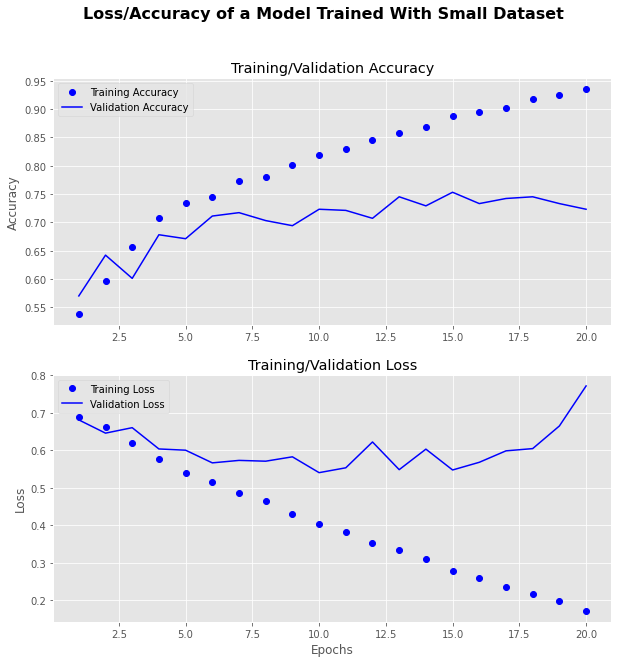

In [ ]:
accuracy = history.history['accuracy']
valAccuracy = history.history['val_accuracy']
loss = history.history['loss']
valLoss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)

plt.style.use('ggplot')
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,10))
plot = ax1.plot(epochs, accuracy, 'bo', label='Training Accuracy')
ax1.plot(epochs, valAccuracy, 'b', label='Validation Accuracy')
ax1.set(title='Training/Validation Accuracy', ylabel='Accuracy')
ax1.legend()

plot = ax2.plot(epochs, loss, 'bo', label='Training Loss')
ax2.plot(epochs, valLoss, 'b', label='Validation Loss')
ax2.set(title='Training/Validation Loss', ylabel='Loss', xlabel='Epochs')
ax2.legend()

fig.suptitle('Loss/Accuracy of a Model Trained With Small Dataset', fontsize=16, fontweight = 'bold')

In [ ]:
# The plot just as expected shows gross overfitting right from the beginning of the training.
# Possibly the accuracy during training will still increase if further epochs are allowed but the
# validation accuracy has gotten to it's peak.

Using Data Augmentation

Overfitting is caused by having too few samples to learn from, disallowing the training of a model that can generalize to new data. Given infinite data, the model would be exposed to every possible aspect of the data distribution at hand and never overfit. Data augmentation takes the approach of generating more training data from existing training samples, by augmenting the samples via a number of random transformations that yield believable-looking images. The goal is that at training time,
the model will never see the exact same picture twice. This helps expose the model to more aspects of the data and generalize better.

In Keras, this can be done by configuring a number of random transformations to be performed on the images read by the ImageDataGenerator instance.

In [ ]:
dataGen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

I. rotation_range is a value in degrees (0–180), a range within which to randomly rotate pictures.
II. width_shift and height_shift are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.
III. shear_range is for randomly applying shearing transformations.
IV. zoom_range is for randomly zooming inside pictures.
V. horizontal_flip is for randomly flipping half the images horizontally—relevant when there are no assumptions of horizontal asymmetry (for example, real-world pictures).
VI. fill_mode is the strategy used for filling in newly created pixels, which can
appear after a rotation or a width/height shift.

Displaying Some Randomly Augmented Training Images

In [ ]:
from tensorflow.keras.preprocessing import image

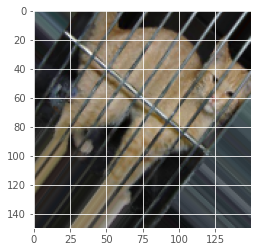

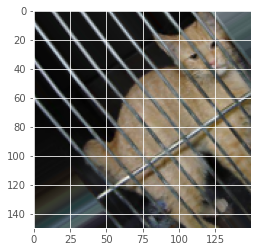

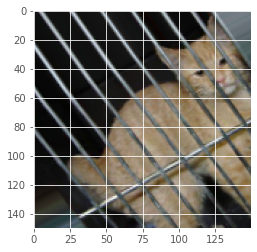

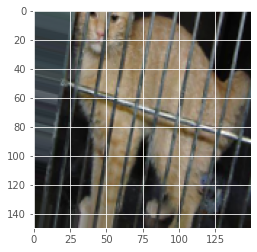

In [ ]:
fnames = [os.path.join(trainCatsDir, fname) for fname in os.listdir(trainCatsDir)]
imgPath = fnames[10]
img = image.load_img(imgPath, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in dataGen.flow(x, batch_size=1):
    plt.figure(i)
    imgPlot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
        
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
# This new neural construct contains a Dropout layer inorder to regularize and further prevent over-
# fitting.

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['accuracy'])

Training the Convnet Using Data-Augmentation Generators

In [ ]:
trainDataGen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [ ]:
testDataGen = ImageDataGenerator(rescale=1./255)

In [ ]:
trainGenerator = trainDataGen.flow_from_directory(
    trainDir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [ ]:
validationGenerator = testDataGen.flow_from_directory(
    validationDir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 1000 images belonging to 2 classes.


In [ ]:
from tensorflow import keras

In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint('./Computer Vision2.h5', save_best_only=True)
earlyStopping = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [ ]:
history = model.fit_generator(
    trainGenerator,
    steps_per_epoch=100,
    epochs=150,
    validation_data=validationGenerator,
    validation_steps=50,
    callbacks=[checkpoint, earlyStopping])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/150
100/100 [==============================] - 119s 1s/step - loss: 0.4429 - accuracy: 0.7810 - val_loss: 0.5060 - val_accuracy: 0.7410
Epoch 2/150
100/100 [==============================] - 117s 1s/step - loss: 0.4427 - accuracy: 0.8000 - val_loss: 0.4571 - val_accuracy: 0.7920
Epoch 3/150
100/100 [==============================] - 118s 1s/step - loss: 0.4540 - accuracy: 0.7815 - val_loss: 0.5011 - val_accuracy: 0.7720
Epoch 4/150
100/100 [==============================] - 116s 1s/step - loss: 0.4413 - accuracy: 0.7845 - val_loss: 0.5576 - val_accuracy: 0.7230
Epoch 5/150
100/100 [==============================] - 117s 1s/step - loss: 0.4392 - accuracy: 0.7985 - val_loss: 0.4353 - val_accuracy: 0.7930
Epoch 6/150
100/100 [==============================] - 118s 1s/step - loss: 0.4553 - accuracy: 0.7745 - val_loss: 0.6507 - val_accuracy: 0.6980
Epoch 7/150
100/100 [==============================] - 117s 1s/step - loss: 0.4462 - accuracy: 0.7955 - val_loss: 0.5681 - val_accuracy:

In [ ]:
model.save('./Computer Vision2.h5')

Text(0.5, 0.98, 'Loss/Accuracy of a Model Trained With Augmented Dataset')

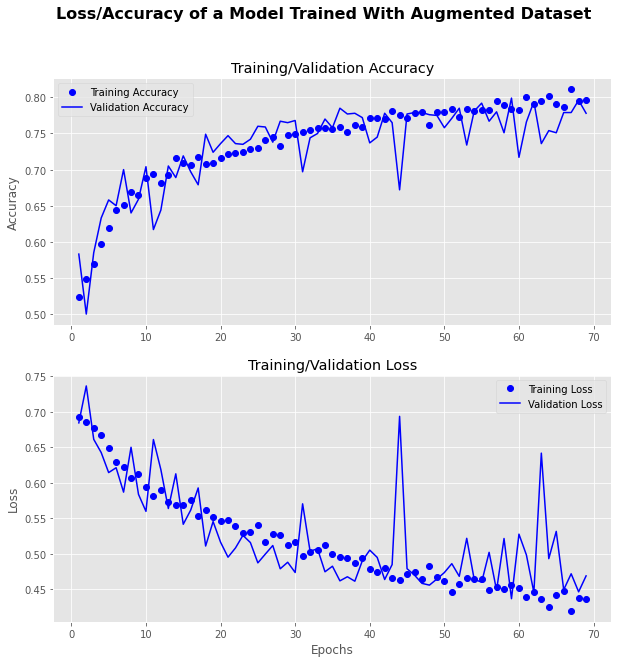

In [ ]:
accuracy = history.history['accuracy']
valAccuracy = history.history['val_accuracy']
loss = history.history['loss']
valLoss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)

plt.style.use('ggplot')
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,10))
plot = ax1.plot(epochs, accuracy, 'bo', label='Training Accuracy')
ax1.plot(epochs, valAccuracy, 'b', label='Validation Accuracy')
ax1.set(title='Training/Validation Accuracy', ylabel='Accuracy')
ax1.legend()

plot = ax2.plot(epochs, loss, 'bo', label='Training Loss')
ax2.plot(epochs, valLoss, 'b', label='Validation Loss')
ax2.set(title='Training/Validation Loss', ylabel='Loss', xlabel='Epochs')
ax2.legend()

fig.suptitle('Loss/Accuracy of a Model Trained With Augmented Dataset', fontsize=16, fontweight = 'bold')

In [ ]:
# The overfitting earlier experienced is now mitigated.
# The accuracy can probably be improved by training for more epochs

Using a Pretrained Convnet for Fine-Tuning

A pretrained network is a saved network that was previously trained on a large dataset, typically on a large-scale image-classification task. If this original dataset is large enough and general enough, then the spatial hierarchy of features learned by the pretrained network can effectively act as a generic model of the visual world, and hence its features can prove useful for many different computervision problems, even though these new problems may involve completely different classes than those of the original task.

Here’s the list of image-classification models that are available as part of keras applications:
I. Xception
II. Inception V3
III. ResNet50
IV. VGG16
V. VGG19
VI. MobileNet

This project uses the VGG16 model.

In [ ]:
from tensorflow.keras.applications import VGG16

In [ ]:
convBase = VGG16(weights='imagenet',
                include_top=False,
                input_shape=(150, 150, 3))

In [ ]:
convBase.trainable = True

setTrainable = False
for layer in convBase.layers:
    if layer.name == 'block5_conv1':
        setTrainable = True
    if setTrainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-5),
             metrics=['accuracy'])

In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint('./Computer Vision5.h5', save_best_only=True)
earlyStopping = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [ ]:
history = model.fit_generator(
    trainGenerator, steps_per_epoch = 100, epochs=100,
    validation_data=validationGenerator, validation_steps=50, callbacks=[checkpoint, earlyStopping])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
20/20 [==============================] - 763s 39s/step - loss: 0.3679 - accuracy: 0.8380 - val_loss: 0.2767 - val_accuracy: 0.8800
Epoch 2/5
20/20 [==============================] - 751s 38s/step - loss: 0.3266 - accuracy: 0.8600 - val_loss: 0.2406 - val_accuracy: 0.8930
Epoch 3/5
20/20 [==============================] - 749s 38s/step - loss: 0.2992 - accuracy: 0.8720 - val_loss: 0.2224 - val_accuracy: 0.9000
Epoch 4/5
20/20 [==============================] - 749s 38s/step - loss: 0.2909 - accuracy: 0.8860 - val_loss: 0.2158 - val_accuracy: 0.9020
Epoch 5/5
20/20 [==============================] - 759s 39s/step - loss: 0.2903 - accuracy: 0.8755 - val_loss: 0.2058 - val_accuracy: 0.9090


Text(0.5, 0.98, 'Loss/Accuracy of a Finetuned PreTrained Model with Augmented Dataset')

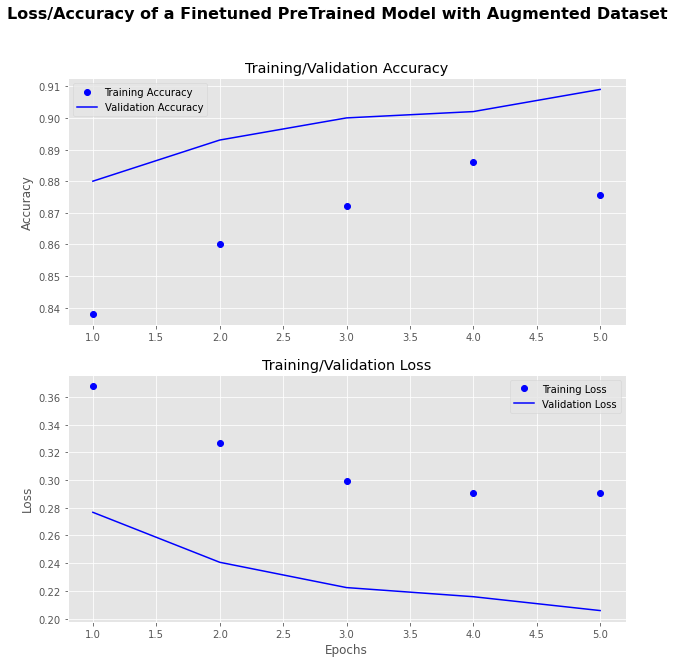

In [92]:
accuracy = history.history['accuracy']
valAccuracy = history.history['val_accuracy']
loss = history.history['loss']
valLoss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)

plt.style.use('ggplot')
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,10))
plot = ax1.plot(epochs, accuracy, 'bo', label='Training Accuracy')
ax1.plot(epochs, valAccuracy, 'b', label='Validation Accuracy')
ax1.set(title='Training/Validation Accuracy', ylabel='Accuracy')
ax1.legend()

plot = ax2.plot(epochs, loss, 'bo', label='Training Loss')
ax2.plot(epochs, valLoss, 'b', label='Validation Loss')
ax2.set(title='Training/Validation Loss', ylabel='Loss', xlabel='Epochs')
ax2.legend()

fig.suptitle('Loss/Accuracy of a Finetuned PreTrained Model with Augmented Dataset', fontsize=16, fontweight = 'bold')

In [ ]:
# Accuracy wouldn't just be improved by running more epochs, it definitely needs to be done.

Evaluating the Pretrained Convnet on the Test Images

In [103]:
testGenerator = testDataGen.flow_from_directory(
    testDir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 1000 images belonging to 2 classes.


In [104]:
testLoss, testAccuracy = model.evaluate_generator(
    testGenerator, steps=50,)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


In [105]:
print('Test Accuracy:', testAccuracy)

Test Accuracy: 0.9100000262260437


In [ ]:
# This model will be accurate 91/100 times. Not a bad performance considering it was trained on a
# small dataset.

In [ ]:
# Using a pretrained network for feature extraction with and without data augmentation to boost
# accuracy and eliminate overfitting are methods that can also be explored.